In [1]:
!pip install scikit-plot

###**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import scikitplot as skplt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

###**Import your dataset**

In [3]:
#reading the .xlsx dataset in to the dataframe
df = pd.read_excel("AIDA-Dataset.xlsx")

###**Data preprossesing**

In [4]:
short_names_mapping = {
    'Do you want to participate in this survey?': 'Participation',
    'Please state your age? (e.g. 25)': 'Age',
    'What is your gender?': 'Gender',
    'What degree are you currently pursuing?': 'Degree',
    'What is your current academic year? (e.g. 2)': 'AcademicYear',
    'Which medium of school have you come from?': 'SchoolMedium',
    'Which department do you study in?': 'Department',
    'What is your current cumulative grade points average (CGPA)?': 'CGPA',
    'Do you have any personal history of depression?': 'DepressionHistory',
    'What is your current relationship status?': 'RelationshipStatus',
    'What is your religion?': 'Religion',
    'What is your current place of residence?': 'Residence',
    'Currently I live - ': 'CurrentLocation',
    'Number of siblings (e.g. 2)': 'SiblingsCount',
    'What is your ordinal position/birth order among your siblings? (e.g. 1)': 'SiblingOrder',
    ' [I feel that I have additional responsibility to be in this position.]': 'ResponsibilityFeeling',
    'What is your father’s occupation? (If you do not see the occupation listed below or in case of a deceased father please choose the "other" option.)': 'FatherOccupation',
    'What is your mother’s occupation? (If you do not see the occupation listed below or in case of a deceased mother please choose the "other" option.)': 'MotherOccupation',
    'What is your family’s (household) average monthly income? (e.g. 2000)': 'FamilyIncome',
    'Do you have any financial hardship currently?': 'FinancialHardship',
    'Is your family financially dependent on you?': 'FinancialDependency',
    'Do you have anyone in your family who has been suffering from fatal diseases?': 'FamilyIllness',
    ' [How often do you communicate with your parents?]': 'ParentalCommunicationFrequency',
    'Give your opinion about these: [My parents are very strict about my daily life style]': 'ParentalStrictness',
    'Give your opinion about these: [My parents give pressure for my academic subject selection]': 'ParentalAcademicPressure',
    'Give your opinion about these: [My parents give pressure for my marriage.]': 'ParentalMarriagePressure',
    'Give your opinion about these: [My parents give pressure for my career choice.]': 'ParentalCareerPressure',
    'Give your opinion about these: [My parents give pressure regarding my decision on studying abroad]': 'ParentalStudyAbroadPressure',
    'Give your opinion about these statements [I have bad understanding with my parents]': 'ParentalUnderstanding',
    'Give your opinion about these statements [I have bad bonding with my siblings]': 'SiblingBonding',
    'Give your opinion about these statements [My  parents have unstable relationship]': 'ParentalRelationshipStability',
    'Give your opinion about these statements [I don’t get along with most of my classmates/friends]': 'PeerRelationship',
    'Give your opinion about these statements [My university teachers are unsupportive]': 'TeacherSupport',
    'Give your opinion about these statements [An unstable relationship with my partner affects my life.]': 'PartnerRelationshipImpact',
    'Give your opinion about these statements [A discouraging working environment (colleague/boss) affects the output of my work.]': 'WorkEnvironmentImpact',
    ' [I feel society interferes with my freedom of expression (freedom of speech / movement / etc...)]': 'SocietalInterference',
    'Have you ever experienced this sort of violence before? [I have faced Physical Violence before. (someone uses his/her body part or an object to control my actions) (শারিরিকনির্যাতন)]': 'PhysicalViolenceExperience',
    'Have you ever experienced this sort of violence before? [I have faced Sexual Violence before. (i am/was forced to unwillingly take part in sexual activity) (যৌনসহিংসতা)]': 'SexualViolenceExperience',
    'Have you ever experienced this sort of violence before? [I have faced Verbal Violence before. (someone uses language, whether spoken or written as an abusing tool against me) (মৌখিকগালি)]': 'VerbalViolenceExperience',
    'Have you ever experienced this sort of violence before? [I have faced Emotional Violence before. (someone says or does something to make me feel stupid or worthless) (মানসিকহিংসা)]': 'EmotionalViolenceExperience',
    'What kind of institution do you study in?': 'InstitutionType',
    'Self-perception on Academic status: [My academic performance is very poor.]': 'PoorAcademicPerformanceSelfPerception',
    'Self-perception on Academic status: [I have been criticized for my academic result.]': 'AcademicCriticismSelfPerception',
    'Self-perception on Academic status: [I am unsatisfied with my academic workload (i.e., presentations, assignments, tutorials)]': 'UnsatisfiedAcademicWorkloadSelfPerception',
    'Give your opinion for these: [I am not studying in my subject of interest.]': 'NonInterestSubjectOpinion',
    'Give your opinion for these: [I am unhappy with the subject that I am studying.]': 'UnhappySubjectOpinion',
    'Give your opinion for these: [I am not studying in the institution of my interest.]': 'NonInterestInstitutionOpinion',
    'Give your opinion for these: [I am unhappy with the institution that I am studying.]': 'UnhappyInstitutionOpinion',
    'Did you select the subject due to career prospects only?': 'CareerProspectsSubjectSelection',
    'What is your current employment status?': 'EmploymentStatus',
    'Which of the following is true for you?': 'PersonalSituation',
    'How the pandemic is affecting your full time /part time job/tutoring?': 'PandemicImpactOnWork',
    'I am satisfied with my current job.': 'JobSatisfaction',
    'My family/partner is satisfied with my current job.': 'FamilyPartnerJobSatisfaction',
    ' [In my opinion, enough jobs are not available related to my pursued subject. (your academic subject )]': 'InsufficientJobsSubjectOpinion',
    'How many close friends (approximately) do you have? (e.g. 3)': 'CloseFriendsCount',
    ' [How often do you hang out with your friends?]': 'FriendHangoutFrequency',
    'Are you involved in any extracurricular activities?': 'ExtracurricularInvolvement',
    'How strongly do you agree with each of the following questions: [How often do you smoke?]': 'SmokingFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you take drugs?]': 'DrugUseFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you drink alcohol?]': 'AlcoholConsumptionFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you engage in physical exercise?]': 'PhysicalExerciseFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you practice religious activities?]': 'ReligiousActivitiesFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you play video games?]': 'VideoGamePlayingFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you play sports?]': 'SportsPlayingFrequencyPerception',
    'On average how many hours do you spend in social media? (e.g. 5)': 'SocialMediaUsageHours',
    'Give your opinion on these: [The success stories of my peers in social media sometimes pose negative impact on me]': 'PeerSuccessImpactOnSocialMediaOpinion',
    'Give your opinion on these: [Social media has negative influence on my purchase decision]': 'SocialMediaInfluenceOnPurchaseDecisionOpinion',
    "Give your opinion on these: [I find human bonding less trust-worthy because it's easy to become imposters on social media]": 'TrustInHumanBondingOnSocialMediaOpinion',
    'Give your opinion on these: [I feel numbness of feelings as I am constantly seeing variety of incidents on social media.]': 'NumbnessFeelingsDueToSocialMediaOpinion',
    'Give your opinion on these: [I like to interact with my friends in person rather than in virtual mode.]': 'PreferenceForInPersonInteractionOpinion',
    'Sad': 'Sadness',
    'Depressed mood (sadness, hopeless, helpless, worthless)': 'DepressedMood',
    'Future': 'FutureOutlook',
    'Failure': 'FearOfFailure',
    'Satisfaction': 'SatisfactionLevel',
    'Guilty ': 'FeelingsOfGuilt',
    'Feelings of guiltiness ': 'GuiltFeelings',
    'Punished': 'FeelingsOfPunishment',
    'Disappointment ': 'FeelingsOfDisappointment',
    'Blame on me': 'SelfBlame',
    'Cry ': 'TendencyToCry',
    'Irritated': 'Irritability',
    'Interest in other people': 'InterestInOthers',
    'Decisions': 'DecisionMaking',
    'Look': 'AppearanceConcern',
    'Self-Care (This question is pertaining to what you feeling right now)': 'SelfCarePerception',
    'Energy Level:': 'EnergyLevel',
    'Work and Activities': 'WorkAndActivitiesLevel',
    'Sleep ': 'SleepQuality',
    'Sleeping Too Much:': 'ExcessiveSleeping',
    'Tired': 'Fatigue',
    'Appetite': 'AppetiteLevel',
    'a)\tAccording to you:': 'SubjectiveHealthPerception',
    'b)\tAccording to weekly measurements:': 'ObjectiveHealthPerception',
    'Feelings of suicide': 'SuicidalFeelings',
    'Retardation (প্রতিবন্ধকতা) (slowness of thought and speech, impaired ability to concentrate, decreased motor activity)/ (চিন্তা , কথা , মনোযোগ , মস্তিষ্কের কর্মক্ষমতা হ্রাস)': 'CognitiveRetardation',
    'Agitation (feeling of irritability or severe restlessness) (উত্কণ্ঠা)': 'Agitation',
    'Anxiety Psychic (মানসিক দুশ্চিন্তা)': 'PsychicAnxiety',
    ' [I felt that I was rather touchy/oversensitive over the past week]': 'SensitivityPerception',
    ' [I was aware of the action of my heart in the absence of physical exertion (e.g. sense of heart rate increase, heart missing a beat)]': 'HeartAwarenessPerception',
    'ANXIETY SOMATIC (দৈহিক) (physiological concomitants of anxiety) such as\ngastro-intestinal – dry mouth, wind, indigestion (বদ হজম), diarrhea, cramps ( পেটে ব্যাথা), belching( বমি)\ncardio-vascular – palpitations ( বুক ধড়ফড়) , headaches\nrespiratory – hyperventilation ( জোরে জোরে শ্বাস নেয়া), sighing urinary frequency sweating': 'SomaticAnxietySymptoms',
    'Somatic Symptoms Gastro-Intestinal': 'GastrointestinalSymptoms',
    'General Somatic Symptoms': 'GeneralSomaticSymptoms',
    'Genital Symptoms (symptoms such as loss of libido, menstrual disturbances)': 'GenitalSymptoms',
    'Hypochondriasis (The belief and fear of serious illness) / ( মরণব্যাধি আছে এমন ভ্রান্ত ধারনা )': 'Hypochondriasis',
    'Insight (self-perception)': 'SelfPerception',
}
df.rename(columns=short_names_mapping, inplace=True)


###**Feature Engineering**

In [5]:
# demographic_feature=['Age',
#  'Gender',
#  'Degree',
#  'SchoolMedium',
#  'CGPA']

In [6]:
# df_demography = df[demographic_feature]
# df_demography.head()

In [7]:
df.columns.tolist()

['Participation',
 'Age',
 'Gender',
 'Degree',
 'AcademicYear',
 'SchoolMedium',
 'Department',
 'CGPA',
 'DepressionHistory',
 'RelationshipStatus',
 'Religion',
 'Residence',
 'CurrentLocation',
 'SiblingsCount',
 'SiblingOrder',
 'ResponsibilityFeeling',
 'FatherOccupation',
 'MotherOccupation',
 'FamilyIncome',
 'FinancialHardship',
 'FinancialDependency',
 'FamilyIllness',
 'ParentalCommunicationFrequency',
 'ParentalStrictness',
 'ParentalAcademicPressure',
 'ParentalMarriagePressure',
 'ParentalCareerPressure',
 'ParentalStudyAbroadPressure',
 'ParentalUnderstanding',
 'SiblingBonding',
 'ParentalRelationshipStability',
 'PeerRelationship',
 'TeacherSupport',
 'PartnerRelationshipImpact',
 'WorkEnvironmentImpact',
 'SocietalInterference',
 'PhysicalViolenceExperience',
 'SexualViolenceExperience',
 'VerbalViolenceExperience',
 'EmotionalViolenceExperience',
 'InstitutionType',
 'PoorAcademicPerformanceSelfPerception',
 'AcademicCriticismSelfPerception',
 'UnsatisfiedAcademicWor

In [8]:
df.head()

,Participation,Age,Gender,Degree,AcademicYear,SchoolMedium,Department,CGPA,DepressionHistory,RelationshipStatus,...,Agitation,PsychicAnxiety,SensitivityPerception,HeartAwarenessPerception,SomaticAnxietySymptoms,GastrointestinalSymptoms,GeneralSomaticSymptoms,GenitalSymptoms,Hypochondriasis,SelfPerception
0,Yes,23,Female,Undergraduate,4,Bangla Medium,Mathematical/Engineering & Physical Sciences,3.38,No,Single,...,Fidgetiness/ (অস্থিরতা),Subjective(depending on patient/subject) tensi...,some of the time,not at all,Absent.,None.,None.,Absent.,Not present.,Denies being ill at all.
1,Yes,24,Female,Postgraduate,1,English Medium,Business & Economics Studies,3.08,Yes,Single,...,None.,Worrying about minor matters. (ছোটখাট বিষয় নিয়...,not at all,not at all,Mild.,None.,None.,Absent.,Not present.,Denies being ill at all.
2,Yes,24,Male,Undergraduate,4,Bangla Medium,Mathematical/Engineering & Physical Sciences,3.05,Yes,Prefer not to say,...,Fidgetiness/ (অস্থিরতা),Subjective(depending on patient/subject) tensi...,some of the time,a good part of time,Absent.,None.,"Heaviness in limbs, back or head. Backaches, h...",Absent.,Not present.,Acknowledges being depressed and ill.
3,Yes,22,Male,Postgraduate,1,Bangla Medium,Mathematical/Engineering & Physical Sciences,3.82,Yes,Single,...,None.,Worrying about minor matters. (ছোটখাট বিষয় নিয়...,a good part of time,some of the time,Mild.,None.,None.,Absent.,Not present.,Denies being ill at all.
4,Yes,25,Male,Undergraduate,4,Bangla Medium,Business & Economics Studies,3.40,Yes,Single,...,"Moving about, can’t sit still.",Subjective(depending on patient/subject) tensi...,some of the time,some of the time,Mild.,Loss of appetite but eating without staff enco...,"Heaviness in limbs, back or head. Backaches, h...",Severe.,Preoccupation (আচ্ছন্ন) with health,Acknowledges being depressed and ill.


In [9]:
# K_10 = ['Fatigue', 'DecisionMaking', 'DecisionMaking', 'DepressedMood', 'Agitation',
#                             'Agitation', 'SelfPerception', 'EnergyLevel', 'Sadness', 'DepressedMood']

In [10]:
import pandas as pd

# Assuming df is your original DataFrame and df_scale is the DataFrame where you want to store mapped values.
df_scale = df.copy()

# Mapping for "feeling tired" with 4 levels
df_scale['feeling tired'] = df['Fatigue'].replace({
    "I don't get more tired than usual.": 1,
    "I get tired more easily than I used to.": 3,
    "I get tired from doing almost anything.": 4,
    "I am too tired to do anything.": 5
})

# Mapping for "trouble concentrating" with 4 levels (assuming DecisionMaking is the correct original column name)
df_scale['trouble concentrating'] = df['DecisionMaking'].replace({
    "I make decisions about as well as I ever could.": 1,
    "I put off making decisions more than I used to.": 3,
    "I have greater difficulty in making decisions more than I used to.": 4,
    "I can't make decisions at all anymore.": 5
})

# Mapping for "feeling down" with 4 levels
df_scale['feeling down'] = df['Sadness'].replace({
    "I do not feel sad.": 1,
    "I feel sad": 3,
    "I am sad all the time and I can't snap out of it.": 4,
    "I am so sad and unhappy that I can't stand it.": 5
})

df_scale['slowness'] = df['Agitation'].replace({
    "None.": 1,
    "Fidgetiness/ (অস্থিরতা)": 2,
    "Playing with hands, hair, etc.": 3,
    "Moving about, can’t sit still.": 4,
    "Hand wringing/(হাত মোচড়ানো), nail biting, hair-pulling, biting of lips.": 5
})

# Assuming 'SelfPerception' has three levels
df_scale['self perception'] = df['SelfPerception'].replace({
    "Denies being ill at all.": 1,
    "Acknowledges being depressed and ill.": 5,
    "Acknowledges illness but attributes cause to bad food, climate, overwork, virus, need for rest, etc.": 3
})

# Assuming 'EnergyLevel' with 4 levels
df_scale['energy level'] = df['EnergyLevel'].replace({
    "There is no change in my usual level of energy.": 1,
    "I get tired more easily than usual.": 3,
    "I have to make a big effort to start or finish my usual daily activities (for example, shopping, homework, cooking, or going to work).": 4,
    "I really cannot carry out most of my usual daily activities because I just don't have the energy.": 5
})


df_scale['depressed mood'] = df['DepressedMood'].replace({
    'Communicates feeling states non-verbally, i.e. through facial expression, posture, voice and tendency to weep. (বিভিন্ন অভিব্যক্তির মাধ্যমে অনুভূতি সমূহ প্রকাশ করে )': 2,
    'Absent.': 1,
    'These feeling states indicated only on questioning. (শুধুমাত্র প্রশ্নকালীন সময়ে এসব অনুভূতি ব্যক্ত করে)': 4,
    'Patient reports virtually only these feeling states in his/her spontaneous verbal and non-verbal communication. (মৌখিক ও অভিব্যক্তি উভয়ের মাধ্যমে অনুভূতি সমূহ ব্যক্ত করে)': 3,
    'These feeling states spontaneously reported verbally. (শুধু মৌখিকভাবে অনুভূতি সমূহ প্রকাশিত)': 5
})

In [11]:
# Selecting only the altered columns and dropping the rest
# df_scale = df_scale.loc[:, ['little interest', 'feeling down', 'Sleeping issue', 'feeling tired',
#                             'poor appetite', 'feeling bad', 'trouble concertrating', 'slowness',
#                             'self harm']]
#Updated K10
#Repeat of 'DepressedMood' = Hopeless, Worthless
#Repeat of Agitation because one question is asking if they felt agitated, and another asking if agitation was so extreme
#that patient could not move
df_scale = df_scale.loc[:, ['feeling tired', 'trouble concentrating', 'trouble concentrating',
                            'depressed mood', 'slowness', 'slowness', 'self perception',
                            'energy level', 'feeling down', 'depressed mood']]


In [12]:
df_scale.columns.tolist()

['feeling tired',
 'trouble concentrating',
 'trouble concentrating',
 'depressed mood',
 'slowness',
 'slowness',
 'self perception',
 'energy level',
 'feeling down',
 'depressed mood']

In [13]:
#printing total score
df_scale['TotalScore'] = df_scale[[col for col in df_scale.columns]].sum(axis=1)
df_scale.head()

,feeling tired,trouble concentrating,trouble concentrating,depressed mood,slowness,slowness,self perception,energy level,feeling down,depressed mood,TotalScore
0,1,1,1,2,2,2,1,1,3,2,26
1,1,1,1,1,1,1,1,1,1,1,16
2,1,1,1,3,2,2,5,1,3,3,34
3,3,1,1,4,1,1,1,3,3,4,34
4,1,3,3,2,4,4,5,1,3,2,46


In [14]:
# Assign an empty list to store the ratings
depression_Level = []

# Iterate over each value in the 'TotalScore' column of the 'df_scale' dataframe
for row in df_scale['TotalScore']:

    if row <= 19:
        depression_Level.append('Well')

    elif row <= 24:
        depression_Level.append('Mild')

    elif row <= 29:
        depression_Level.append('Moderate')
    else:
        depression_Level.append('Severe')

# Assign the ratings list to a new column called 'DepressionLevel' in the 'df_scale' dataframe
df_scale['DepressionLevel'] = depression_Level

df_scale.drop(columns = 'TotalScore', inplace = True)
print(df_scale.shape)
df_scale.head()

(520, 11)


,feeling tired,trouble concentrating,trouble concentrating,depressed mood,slowness,slowness,self perception,energy level,feeling down,depressed mood,DepressionLevel
0,1,1,1,2,2,2,1,1,3,2,Moderate
1,1,1,1,1,1,1,1,1,1,1,Well
2,1,1,1,3,2,2,5,1,3,3,Severe
3,3,1,1,4,1,1,1,3,3,4,Severe
4,1,3,3,2,4,4,5,1,3,2,Severe


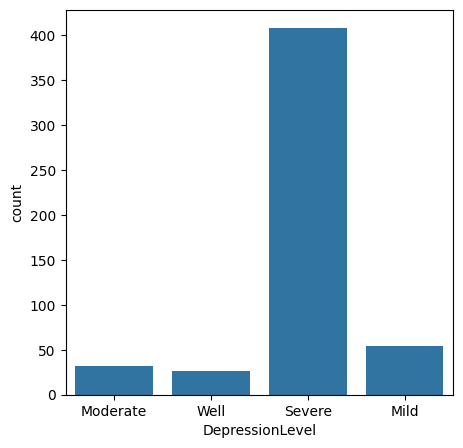

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5))
sns.countplot(x = df_scale['DepressionLevel'] )
plt.show()

In [16]:
# # One-hot encoding for nominal catagorical valuse in demograpy dataframe
# df_demo_encoded = pd.get_dummies(df_demography)
# df_demo_encoded.head()

In [17]:
# #merging both demographic features and scale features
# df_merged = pd.merge(df_demo_encoded, df_scale, left_index=True, right_index=True)
# df_merged.head()

In [18]:
# df_merged.shape

In [19]:
# Assign features (X) and target variable (y) || y = f(x)
X = df_scale.drop('DepressionLevel', axis=1)  # Features (all columns except 'Target column')
y = df_scale['DepressionLevel']  # Target variable ('Target' column)

###**Train Test Split** (No Need to change anthing from here)

In [20]:
# # Split dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

###**Feature Scalling**

In [21]:
# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### **Define 8 different classifiers**

In [22]:
# Defining classifiers in the dictoranry
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors = 8),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

### **Train and evaluate classifiers**

In [23]:
# Store evaluation metrics
evaluation_metrics = {name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} for name in classifiers.keys()}

initial_random_state = 0

# Train and evaluate classifiers with different random_state values
for random_state in range(0, 100):
    # Split dataset into train and test sets with current random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train and evaluate classifiers
    for name, clf in classifiers.items():
        # Train the classifier
        clf.fit(X_train, y_train)

        # Predict using the trained classifier
        y_pred = clf.predict(X_test)

        # Evaluate the classifier's performance
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Append evaluation metrics to the dictionary
        evaluation_metrics[name]['accuracy'].append(accuracy)
        evaluation_metrics[name]['precision'].append(precision)
        evaluation_metrics[name]['recall'].append(recall)
        evaluation_metrics[name]['f1'].append(f1)

# Print the evaluation metrics
for name, metrics in evaluation_metrics.items():
    print(f"-------------{name}:-------------")
    print(f"Mean Accuracy: {np.mean(metrics['accuracy']):.5f} ± {np.std(metrics['accuracy']):.5f}")
    print(f"Mean Precision: {np.mean(metrics['precision']):.5f} ± {np.std(metrics['precision']):.5f}")
    print(f"Mean Recall: {np.mean(metrics['recall']):.5f} ± {np.std(metrics['recall']):.5f}")
    print(f"Mean F1 Score: {np.mean(metrics['f1']):.5f} ± {np.std(metrics['f1']):.5f}")
    print()


-------------KNN:-------------
Mean Accuracy: 0.91769 ± 0.02497
Mean Precision: 0.76176 ± 0.09954
Mean Recall: 0.72440 ± 0.06679
Mean F1 Score: 0.70585 ± 0.07260

-------------Decision Tree:-------------
Mean Accuracy: 0.92942 ± 0.02737
Mean Precision: 0.79416 ± 0.08590
Mean Recall: 0.81939 ± 0.07021
Mean F1 Score: 0.79409 ± 0.07668

-------------Random Forest:-------------
Mean Accuracy: 0.93692 ± 0.02211
Mean Precision: 0.81244 ± 0.07802
Mean Recall: 0.81019 ± 0.06277
Mean F1 Score: 0.79848 ± 0.06688

-------------Logistic Regression:-------------
Mean Accuracy: 0.93702 ± 0.02669
Mean Precision: 0.83437 ± 0.10079
Mean Recall: 0.76237 ± 0.08652
Mean F1 Score: 0.76931 ± 0.09319

-------------Naive Bayes:-------------
Mean Accuracy: 0.80865 ± 0.04678
Mean Precision: 0.50231 ± 0.09926
Mean Recall: 0.60705 ± 0.07168
Mean F1 Score: 0.50735 ± 0.08985

-------------SVM:-------------
Mean Accuracy: 0.93413 ± 0.02305
Mean Precision: 0.83020 ± 0.09476
Mean Recall: 0.75553 ± 0.06068
Mean F1 Scor

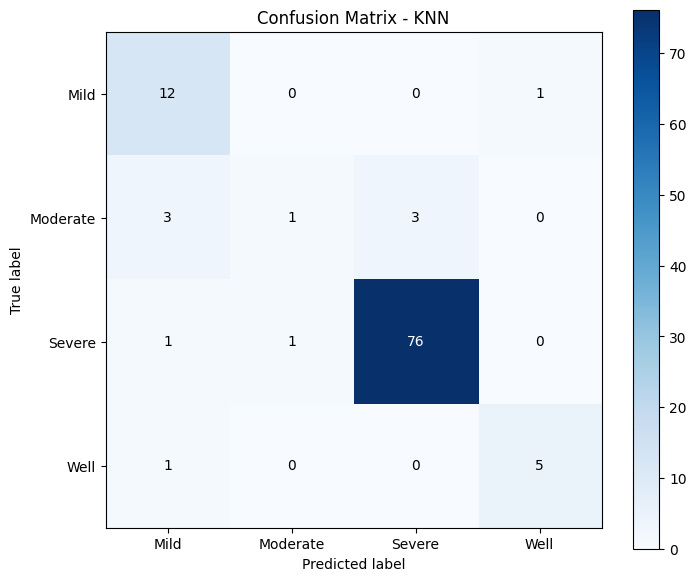

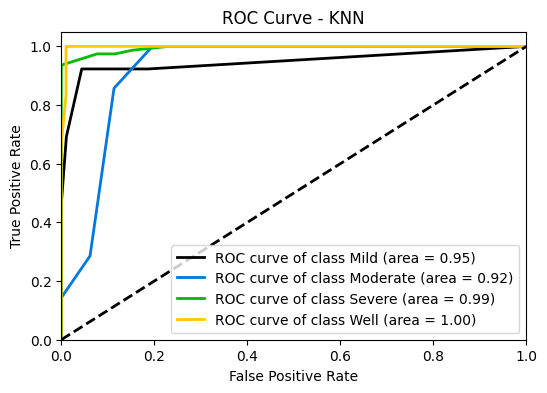

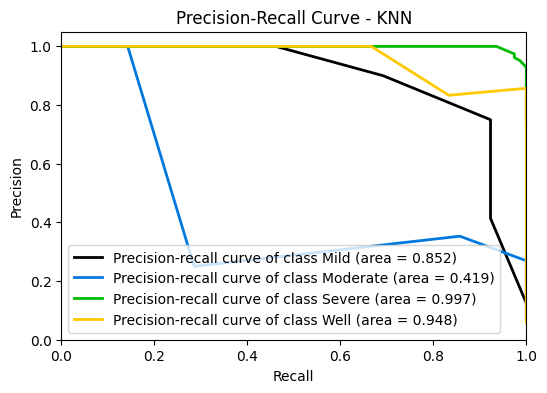

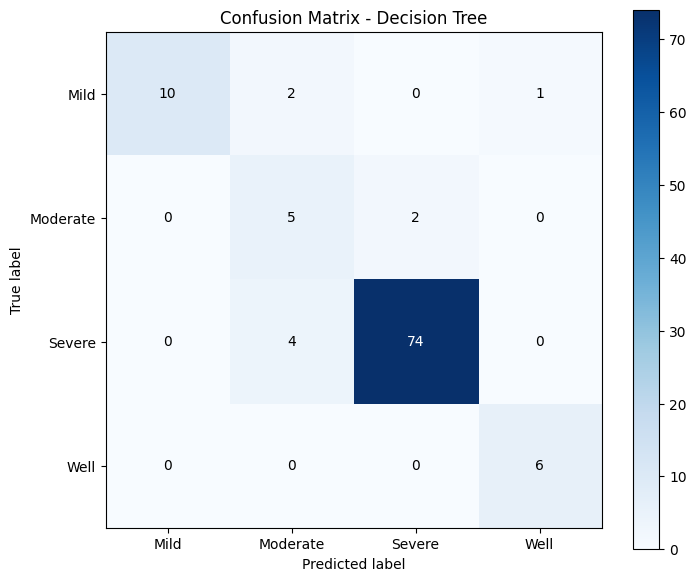

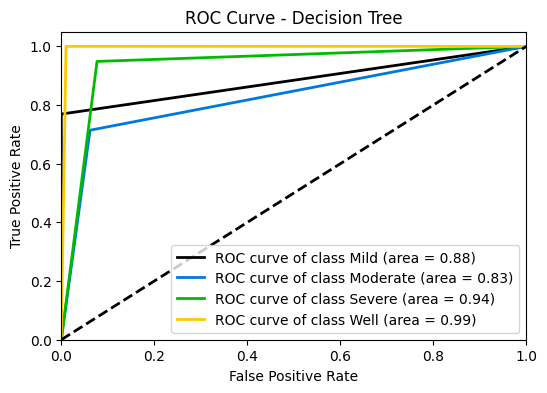

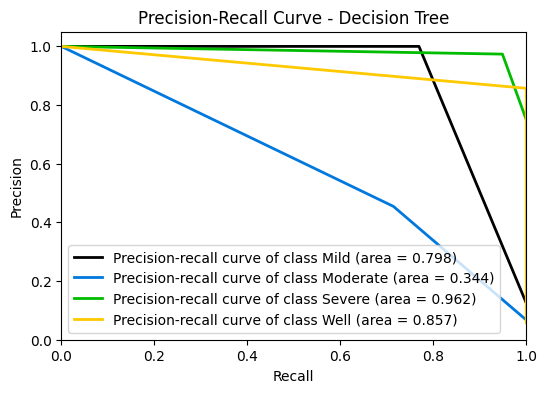

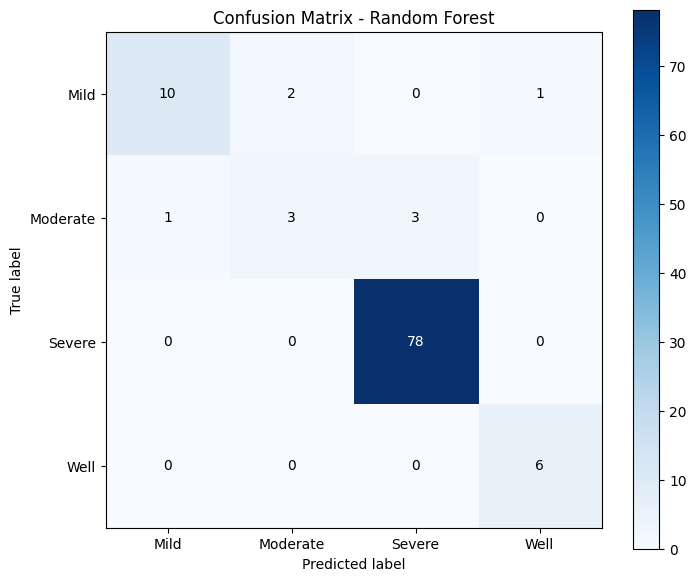

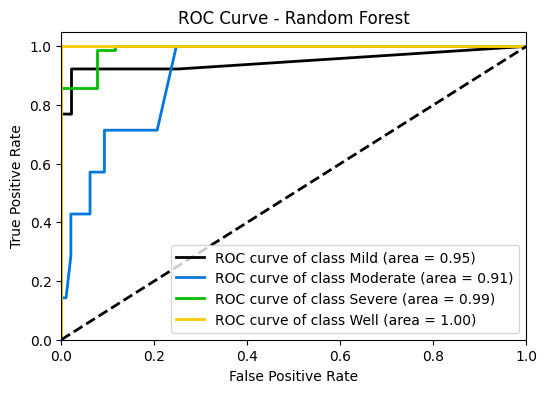

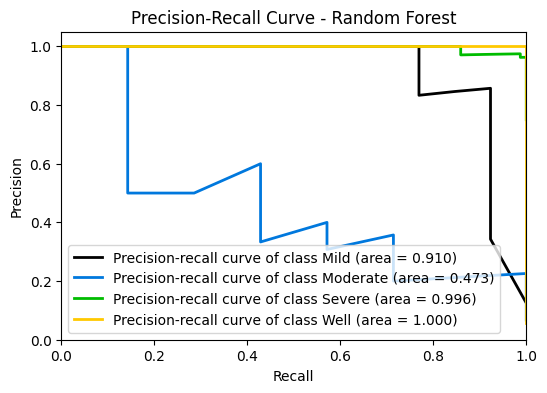

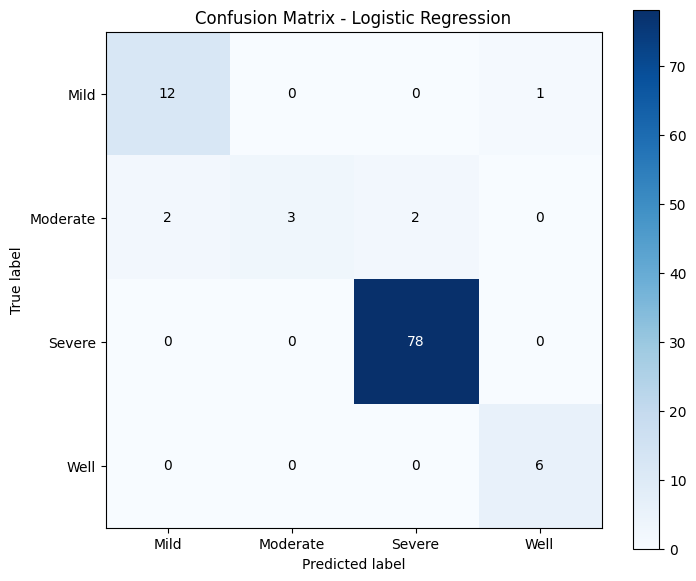

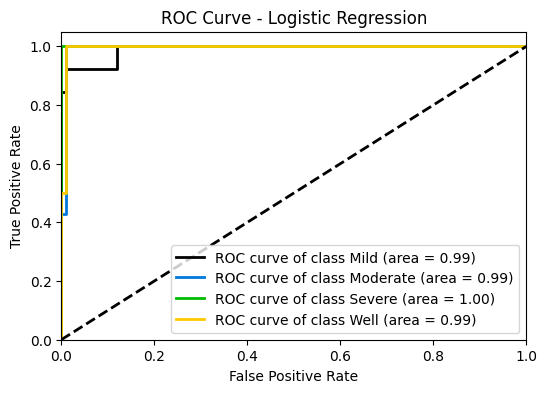

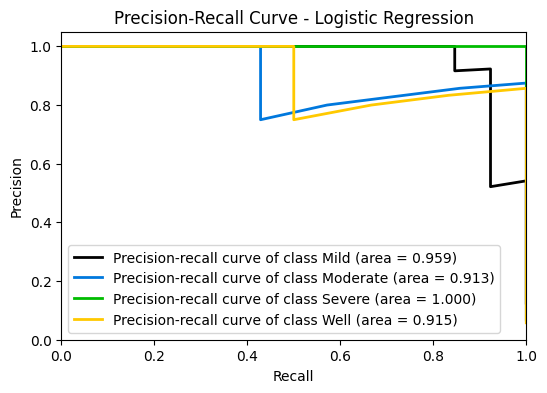

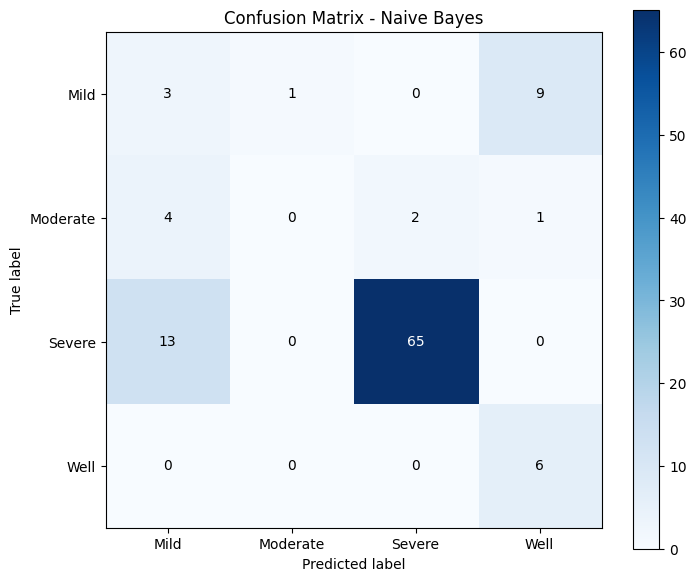

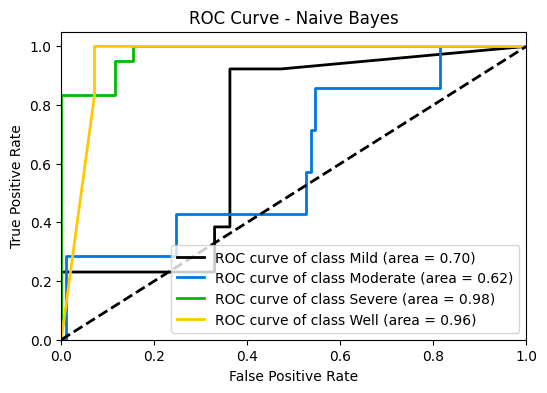

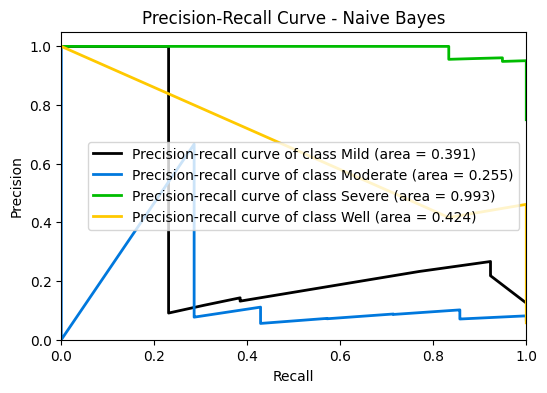

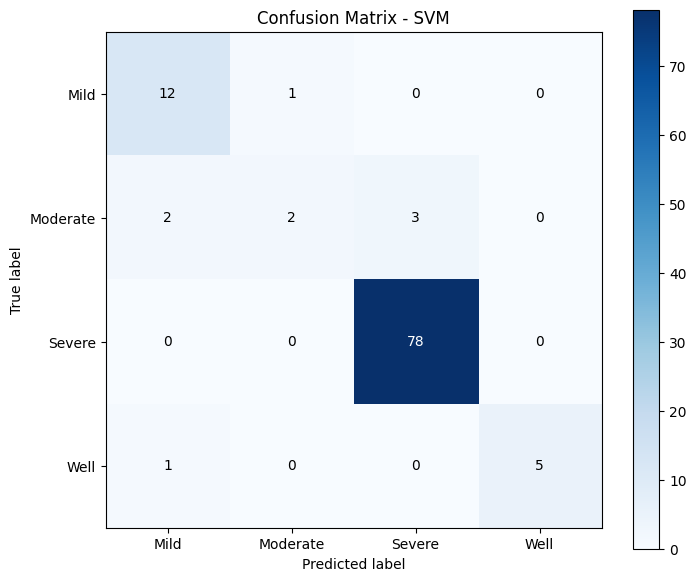

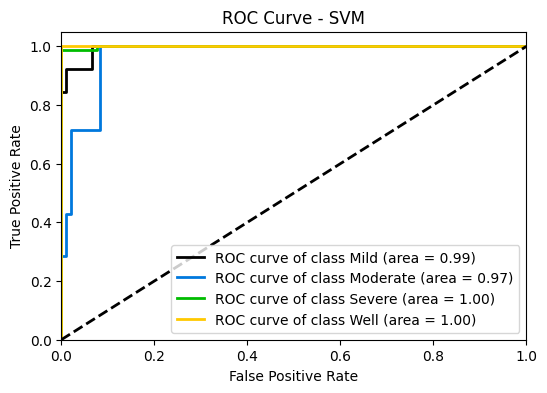

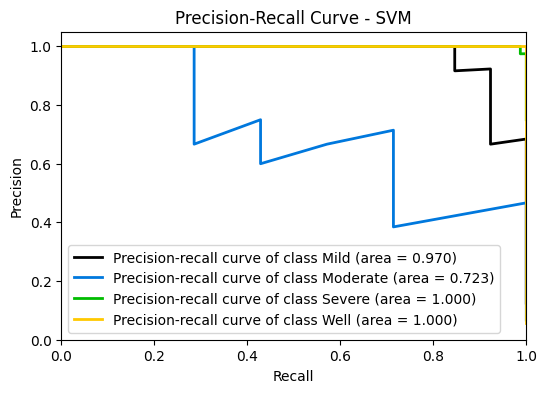

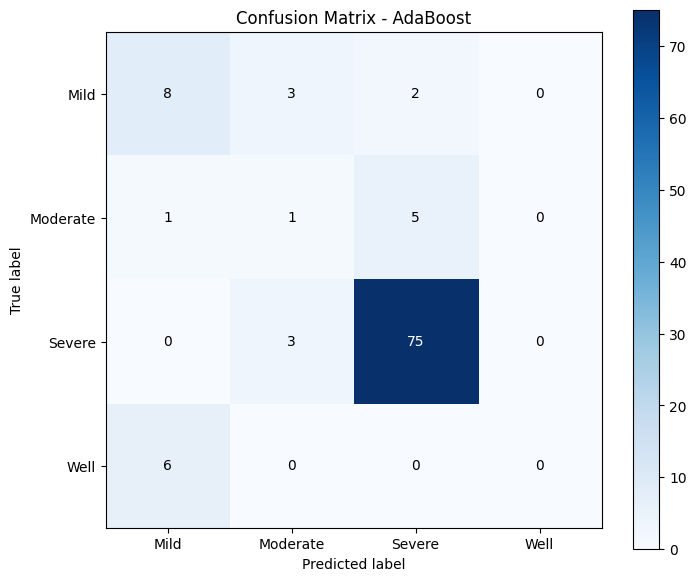

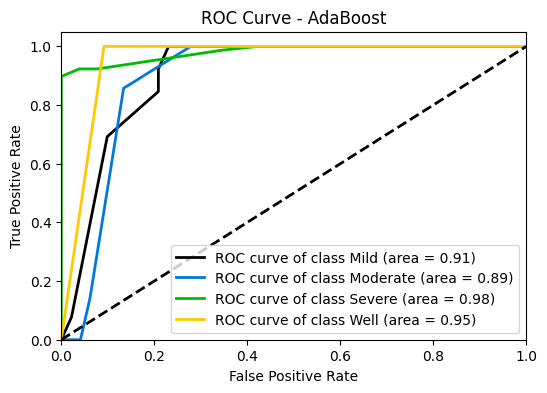

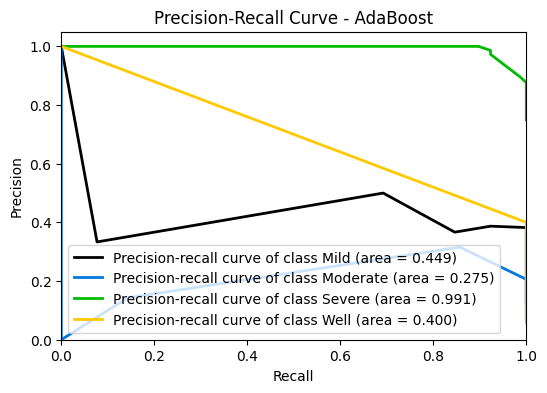

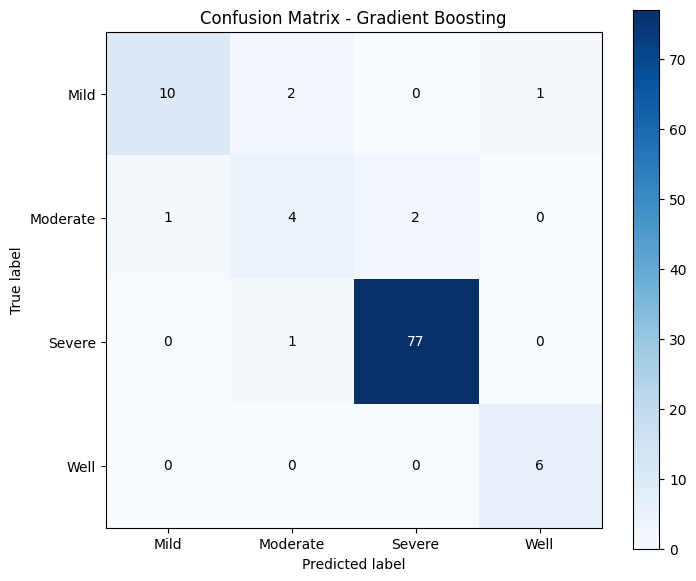

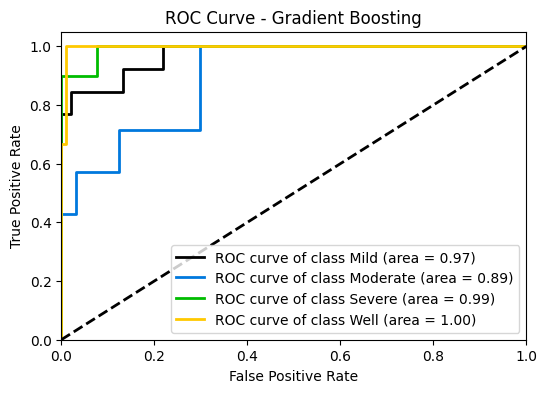

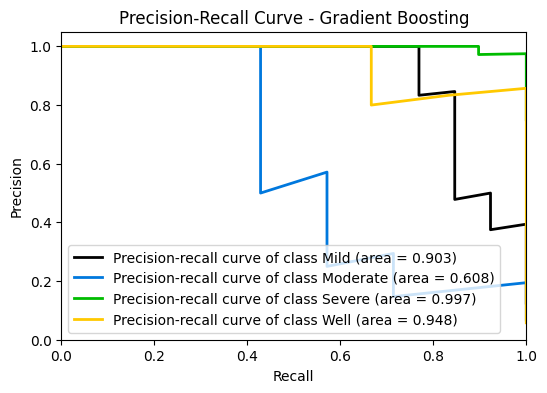

In [24]:
# Evaluating the final results
for name, clf in classifiers.items():
    # Train the best classifier
    clf.fit(X_train, y_train)

    # Predict using the trained classifier
    y_pred = clf.predict(X_test)


    # Plot confusion matrix with classifier name
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(8,7), title=f"Confusion Matrix - {name}")

    # Plot ROC curve with classifier name
    y_probas = clf.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_probas, figsize=(6, 4), plot_micro=False, plot_macro=False, title=f"ROC Curve - {name}")

    # Plot PRC curve with classifier name
    skplt.metrics.plot_precision_recall(y_test, y_probas, figsize=(6, 4), plot_micro=False, title=f"Precision-Recall Curve - {name}")

    print()